In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Set styling for professional charts
sns.set_theme(style="whitegrid")

# Load the processed data from Week 2
df = pd.read_csv('../data/processed/market_features.csv', index_col=0, parse_dates=True)

# Display first 5 rows to confirm load
print("Data Loaded Successfully:")
df.head()

Data Loaded Successfully:


,SPY_Close,^VIX_Close,SPY_Log_Ret,SPY_Vol_30d,SPY_SMA_50
Date,,,,,
2020-03-13,247.524231,57.830002,0.082028,0.576504,293.424511
2020-03-16,220.439209,82.690002,-0.115887,0.657492,291.861722
2020-03-17,232.341202,75.910004,0.052585,0.680401,290.582191
2020-03-18,220.577087,76.449997,-0.051960,0.688081,289.044768
2020-03-19,221.045822,72.000000,0.002123,0.686012,287.533448


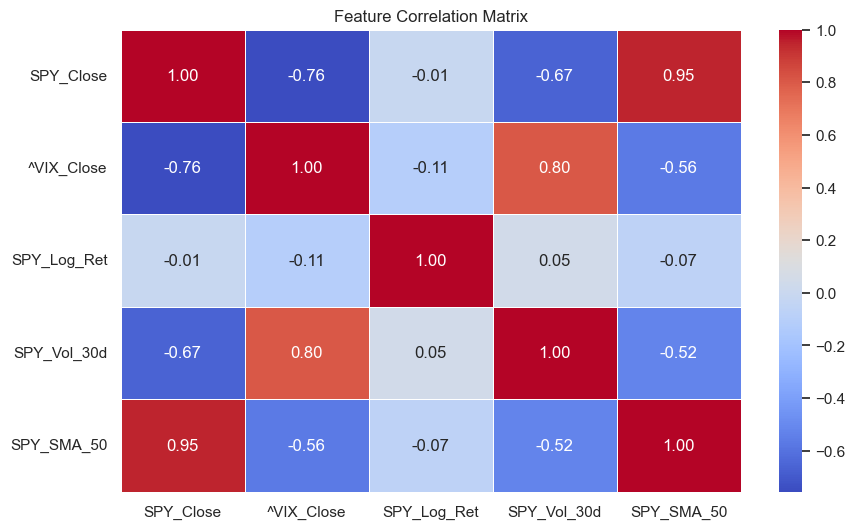

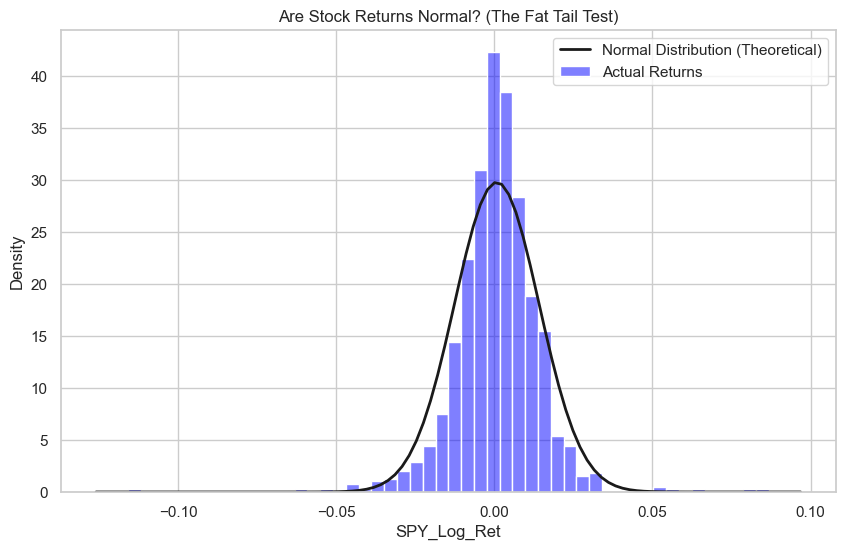

Kurtosis: 10.57
Note: Normal Distribution has Kurtosis ≈ 0 (or 3 depending on definition). High > 0 means Crash Risk.


In [14]:
# Calculate Correlation Matrix
corr_matrix = df.corr()

# Plot Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

from scipy.stats import norm

# 1. Plot Histogram of Actual Returns
plt.figure(figsize=(10, 6))
sns.histplot(df['SPY_Log_Ret'], bins=50, kde=False, stat="density", label="Actual Returns", color="blue", alpha=0.5)

# 2. Overlay a Perfect Normal Distribution
mu, std = norm.fit(df['SPY_Log_Ret'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label="Normal Distribution (Theoretical)")

plt.title("Are Stock Returns Normal? (The Fat Tail Test)")
plt.legend()
plt.show()

# 3. Calculate Kurtosis (The measure of 'Fat Tails')
kurt = df['SPY_Log_Ret'].kurtosis()
print(f"Kurtosis: {kurt:.2f}")
print("Note: Normal Distribution has Kurtosis ≈ 0 (or 3 depending on definition). High > 0 means Crash Risk.")

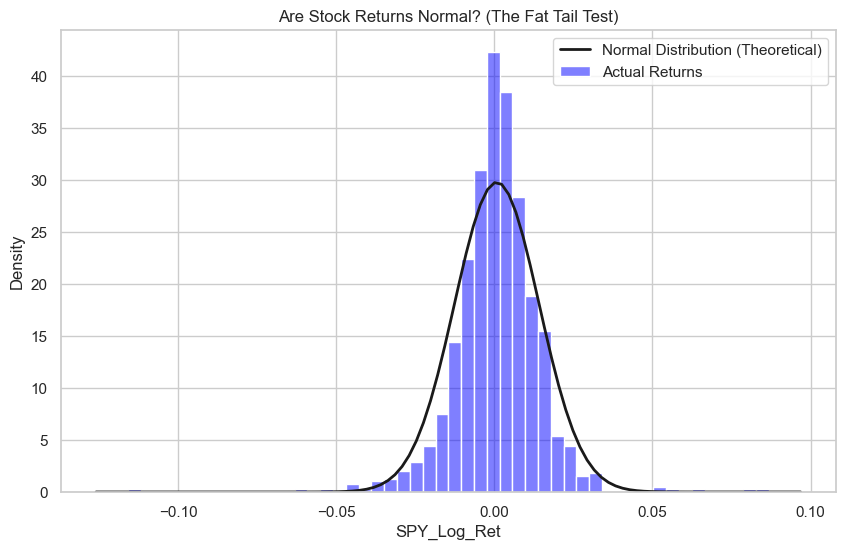

Kurtosis: 10.57
Note: Normal Distribution has Kurtosis ≈ 0 (or 3 depending on definition). High > 0 means Crash Risk.


In [15]:
from scipy.stats import norm

# 1. Plot Histogram of Actual Returns
plt.figure(figsize=(10, 6))
sns.histplot(df['SPY_Log_Ret'], bins=50, kde=False, stat="density", label="Actual Returns", color="blue", alpha=0.5)

# 2. Overlay a Perfect Normal Distribution
mu, std = norm.fit(df['SPY_Log_Ret'])
x = np.linspace(xmin, xmax, 100)
xmin, xmax = plt.xlim()
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label="Normal Distribution (Theoretical)")

plt.title("Are Stock Returns Normal? (The Fat Tail Test)")
plt.legend()
plt.show()

# 3. Calculate Kurtosis (The measure of 'Fat Tails')
kurt = df['SPY_Log_Ret'].kurtosis()
print(f"Kurtosis: {kurt:.2f}")
print("Note: Normal Distribution has Kurtosis ≈ 0 (or 3 depending on definition). High > 0 means Crash Risk.")